In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload
from time import time 
import pickle

import numpy as np
import scipy as sc
import pandas as pd
import torch

import gb1
import models
import utils

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["font.size"] = 12

import seaborn as sns
sns.set_style('whitegrid')

MODEL_PATH = '/data/wongfanc/gb1-models/'

2025-01-24 18:30:26.248676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-24 18:30:26.248709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-24 18:30:26.249771: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 18:30:26.256420: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-24 18:30:27.825676: W tensorflow/comp

In [2]:
# load model
reload(models)
n_hidden = 10
n_model = 3

model = models.FeedForward(
    seq_len=4,
    alphabet=gb1.AA,
    n_hidden=n_hidden,
    n_model=n_model,
    device=torch.device(0)
)
model.load('/data/wongfanc/gb1-models/gb1-h10-10k-051324')

In [3]:
# load design distributions
temperatures = np.arange(0.2, 0.701, 0.005)

temp2theta = {
    round(temp, 4): np.load(MODEL_PATH + 'gb1-h10-10k-t{:.4f}-051324.npz'.format(temp))['theta_lxa']
    for temp in temperatures
}

In [4]:
# load training data (for GMM forecasts)
fname = '/data/wongfanc/gb1-models/gb1-h10-10k-051424-train-idx.npz'
d = np.load(fname)
train_idx = d['train_idx'][: 10000]

df = pd.read_csv('../data/gb1-with-variance.csv')
seq_n = list(df['Variants'].str.lower())
y_n = df['log_fitness'].to_numpy()

trainseq_n = [seq_n[i] for i in train_idx]
ytrain_n = np.array([y_n[i] for i in train_idx])

In [5]:
reload(utils)
reload(gb1)

target_values = np.arange(0.0, 1.01, 0.02)
n_trial = 10
gmm_forecast_qs = [0, 0.5, 1]
design_samples_fname_prefix = 'gb1-h10-10k-051324-samples'


for exceedance_threshold in [1.1]: # [1., 0.95, 0.9, 0.7, 0.35]:

    imp_csv_fname = '/data/wongfanc/gb1-results/gb1-imp-exceed{:.4f}-011425.csv'.format(exceedance_threshold)
    gmm_csv_fname = '/data/wongfanc/gb1-results/gb1-gmm-exceed{:.4f}-011425.csv'.format(exceedance_threshold)
    imp_df = gb1.select_for_exceedance_no_calibration_data(
        model,
        temp2theta,
        target_values,
        n_trial,
        trainseq_n,
        ytrain_n,
        gmm_forecast_qs,
        exceedance_threshold,
        imp_csv_fname=imp_csv_fname,
        gmm_csv_fname=gmm_csv_fname,
        design_samples_fname_prefix=design_samples_fname_prefix,
        load_design_samples=True
    )

Selection quantity is probability of exceeding 1.1.
Range of provided target values: [0.000, 1.000].

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2000-0.npz.
Temp 0.2000, trial 0, q = 0. GMM forecast 0.529, w/ covariate shift 0.021
Temp 0.2000, trial 0, q = 0.5. GMM forecast 0.556, w/ covariate shift 0.094
Temp 0.2000, trial 0, q = 1. GMM forecast 0.582, w/ covariate shift 0.266
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2000-1.npz.
Temp 0.2000, trial 1, q = 0. GMM forecast 0.528, w/ covariate shift 0.021
Temp 0.2000, trial 1, q = 0.5. GMM forecast 0.555, w/ covariate shift 0.094
Temp 0.2000, trial 1, q = 1. GMM forecast 0.581, w/ covariate shift 0.265
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2000-2.npz.
Temp 0.2000, trial 2, q = 0. GMM forecast 0.528, w/ covariate shift 0.021
Temp 0.2000, trial 2, q = 0.5. GMM forecast 0.554, w/ cova

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2100-4.npz.
Temp 0.2100, trial 4, q = 0. GMM forecast 0.527, w/ covariate shift 0.021
Temp 0.2100, trial 4, q = 0.5. GMM forecast 0.554, w/ covariate shift 0.094
Temp 0.2100, trial 4, q = 1. GMM forecast 0.580, w/ covariate shift 0.265
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2100-5.npz.
Temp 0.2100, trial 5, q = 0. GMM forecast 0.527, w/ covariate shift 0.021
Temp 0.2100, trial 5, q = 0.5. GMM forecast 0.554, w/ covariate shift 0.094
Temp 0.2100, trial 5, q = 1. GMM forecast 0.580, w/ covariate shift 0.265
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2100-6.npz.
Temp 0.2100, trial 6, q = 0. GMM forecast 0.529, w/ covariate shift 0.021
Temp 0.2100, trial 6, q = 0.5. GMM forecast 0.555, w/ covariate shift 0.094
Temp 0.2100, trial 6, q = 1. GMM forecast 0.581, w/ covariate shift 0.265
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2200-8.npz.
Temp 0.2200, trial 8, q = 0. GMM forecast 0.562, w/ covariate shift 0.021
Temp 0.2200, trial 8, q = 0.5. GMM forecast 0.595, w/ covariate shift 0.101
Temp 0.2200, trial 8, q = 1. GMM forecast 0.627, w/ covariate shift 0.297
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2200-9.npz.
Temp 0.2200, trial 9, q = 0. GMM forecast 0.562, w/ covariate shift 0.021
Temp 0.2200, trial 9, q = 0.5. GMM forecast 0.595, w/ covariate shift 0.101
Temp 0.2200, trial 9, q = 1. GMM forecast 0.627, w/ covariate shift 0.296
Done with temperature 0.2200 (5 / 101) (249 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (249 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2250-0.npz.
Temp 0.2250, trial 0, q = 0. GMM forecast 0.522

Temp 0.2350, trial 1, q = 0. GMM forecast 0.519, w/ covariate shift 0.021
Temp 0.2350, trial 1, q = 0.5. GMM forecast 0.546, w/ covariate shift 0.093
Temp 0.2350, trial 1, q = 1. GMM forecast 0.571, w/ covariate shift 0.261
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2350-2.npz.
Temp 0.2350, trial 2, q = 0. GMM forecast 0.518, w/ covariate shift 0.021
Temp 0.2350, trial 2, q = 0.5. GMM forecast 0.545, w/ covariate shift 0.092
Temp 0.2350, trial 2, q = 1. GMM forecast 0.571, w/ covariate shift 0.260
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2350-3.npz.
Temp 0.2350, trial 3, q = 0. GMM forecast 0.519, w/ covariate shift 0.021
Temp 0.2350, trial 3, q = 0.5. GMM forecast 0.545, w/ covariate shift 0.092
Temp 0.2350, trial 3, q = 1. GMM forecast 0.571, w/ covariate shift 0.260
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2350-4.npz.
Temp 0.235

Temp 0.2450, trial 5, q = 0. GMM forecast 0.550, w/ covariate shift 0.021
Temp 0.2450, trial 5, q = 0.5. GMM forecast 0.582, w/ covariate shift 0.100
Temp 0.2450, trial 5, q = 1. GMM forecast 0.613, w/ covariate shift 0.289
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2450-6.npz.
Temp 0.2450, trial 6, q = 0. GMM forecast 0.550, w/ covariate shift 0.021
Temp 0.2450, trial 6, q = 0.5. GMM forecast 0.582, w/ covariate shift 0.100
Temp 0.2450, trial 6, q = 1. GMM forecast 0.612, w/ covariate shift 0.288
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2450-7.npz.
Temp 0.2450, trial 7, q = 0. GMM forecast 0.550, w/ covariate shift 0.021
Temp 0.2450, trial 7, q = 0.5. GMM forecast 0.582, w/ covariate shift 0.100
Temp 0.2450, trial 7, q = 1. GMM forecast 0.612, w/ covariate shift 0.288
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2450-8.npz.
Temp 0.245

Temp 0.2550, trial 9, q = 0. GMM forecast 0.546, w/ covariate shift 0.020
Temp 0.2550, trial 9, q = 0.5. GMM forecast 0.578, w/ covariate shift 0.097
Temp 0.2550, trial 9, q = 1. GMM forecast 0.609, w/ covariate shift 0.284
Done with temperature 0.2550 (12 / 101) (596 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (596 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2600-0.npz.
Temp 0.2600, trial 0, q = 0. GMM forecast 0.546, w/ covariate shift 0.021
Temp 0.2600, trial 0, q = 0.5. GMM forecast 0.578, w/ covariate shift 0.097
Temp 0.2600, trial 0, q = 1. GMM forecast 0.608, w/ covariate shift 0.283
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2600-1.npz.
Temp 0.2600, trial 1, q = 0. GMM forecast 0.546, w/ covariate shift 0.021
Temp 0.2600, trial 1, q = 0.5. GMM forecast 0.578, w/ covariate shift 0.097
Te

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2700-3.npz.
Temp 0.2700, trial 3, q = 0. GMM forecast 0.395, w/ covariate shift 0.018
Temp 0.2700, trial 3, q = 0.5. GMM forecast 0.413, w/ covariate shift 0.063
Temp 0.2700, trial 3, q = 1. GMM forecast 0.433, w/ covariate shift 0.173
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2700-4.npz.
Temp 0.2700, trial 4, q = 0. GMM forecast 0.395, w/ covariate shift 0.018
Temp 0.2700, trial 4, q = 0.5. GMM forecast 0.413, w/ covariate shift 0.063
Temp 0.2700, trial 4, q = 1. GMM forecast 0.433, w/ covariate shift 0.173
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2700-5.npz.
Temp 0.2700, trial 5, q = 0. GMM forecast 0.395, w/ covariate shift 0.018
Temp 0.2700, trial 5, q = 0.5. GMM forecast 0.413, w/ covariate shift 0.063
Temp 0.2700, trial 5, q = 1. GMM forecast 0.433, w/ covariate shift 0.173
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2800-7.npz.
Temp 0.2800, trial 7, q = 0. GMM forecast 0.532, w/ covariate shift 0.020
Temp 0.2800, trial 7, q = 0.5. GMM forecast 0.562, w/ covariate shift 0.095
Temp 0.2800, trial 7, q = 1. GMM forecast 0.592, w/ covariate shift 0.275
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2800-8.npz.
Temp 0.2800, trial 8, q = 0. GMM forecast 0.531, w/ covariate shift 0.020
Temp 0.2800, trial 8, q = 0.5. GMM forecast 0.562, w/ covariate shift 0.095
Temp 0.2800, trial 8, q = 1. GMM forecast 0.592, w/ covariate shift 0.275
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2800-9.npz.
Temp 0.2800, trial 9, q = 0. GMM forecast 0.531, w/ covariate shift 0.020
Temp 0.2800, trial 9, q = 0.5. GMM forecast 0.562, w/ covariate shift 0.095
Temp 0.2800, trial 9, q = 1. GMM forecast 0.592, w/ covariate shift 0.275
Done with 

Temp 0.2950, trial 0, q = 0. GMM forecast 0.522, w/ covariate shift 0.021
Temp 0.2950, trial 0, q = 0.5. GMM forecast 0.551, w/ covariate shift 0.093
Temp 0.2950, trial 0, q = 1. GMM forecast 0.580, w/ covariate shift 0.268
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2950-1.npz.
Temp 0.2950, trial 1, q = 0. GMM forecast 0.521, w/ covariate shift 0.021
Temp 0.2950, trial 1, q = 0.5. GMM forecast 0.550, w/ covariate shift 0.093
Temp 0.2950, trial 1, q = 1. GMM forecast 0.579, w/ covariate shift 0.268
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2950-2.npz.
Temp 0.2950, trial 2, q = 0. GMM forecast 0.521, w/ covariate shift 0.021
Temp 0.2950, trial 2, q = 0.5. GMM forecast 0.551, w/ covariate shift 0.093
Temp 0.2950, trial 2, q = 1. GMM forecast 0.579, w/ covariate shift 0.268
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.2950-3.npz.
Temp 0.295

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3050-4.npz.
Temp 0.3050, trial 4, q = 0. GMM forecast 0.366, w/ covariate shift 0.016
Temp 0.3050, trial 4, q = 0.5. GMM forecast 0.384, w/ covariate shift 0.057
Temp 0.3050, trial 4, q = 1. GMM forecast 0.403, w/ covariate shift 0.158
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3050-5.npz.
Temp 0.3050, trial 5, q = 0. GMM forecast 0.364, w/ covariate shift 0.016
Temp 0.3050, trial 5, q = 0.5. GMM forecast 0.381, w/ covariate shift 0.056
Temp 0.3050, trial 5, q = 1. GMM forecast 0.401, w/ covariate shift 0.157
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3050-6.npz.
Temp 0.3050, trial 6, q = 0. GMM forecast 0.365, w/ covariate shift 0.016
Temp 0.3050, trial 6, q = 0.5. GMM forecast 0.383, w/ covariate shift 0.056
Temp 0.3050, trial 6, q = 1. GMM forecast 0.402, w/ covariate shift 0.157
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3150-8.npz.
Temp 0.3150, trial 8, q = 0. GMM forecast 0.350, w/ covariate shift 0.015
Temp 0.3150, trial 8, q = 0.5. GMM forecast 0.368, w/ covariate shift 0.053
Temp 0.3150, trial 8, q = 1. GMM forecast 0.387, w/ covariate shift 0.149
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3150-9.npz.
Temp 0.3150, trial 9, q = 0. GMM forecast 0.351, w/ covariate shift 0.015
Temp 0.3150, trial 9, q = 0.5. GMM forecast 0.369, w/ covariate shift 0.053
Temp 0.3150, trial 9, q = 1. GMM forecast 0.388, w/ covariate shift 0.149
Done with temperature 0.3150 (24 / 101) (1200 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (1200 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3200-0.npz.
Temp 0.3200, trial 0, q = 0. GMM forecast 0.

Temp 0.3300, trial 1, q = 0. GMM forecast 0.459, w/ covariate shift 0.018
Temp 0.3300, trial 1, q = 0.5. GMM forecast 0.483, w/ covariate shift 0.077
Temp 0.3300, trial 1, q = 1. GMM forecast 0.507, w/ covariate shift 0.222
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3300-2.npz.
Temp 0.3300, trial 2, q = 0. GMM forecast 0.459, w/ covariate shift 0.018
Temp 0.3300, trial 2, q = 0.5. GMM forecast 0.483, w/ covariate shift 0.077
Temp 0.3300, trial 2, q = 1. GMM forecast 0.507, w/ covariate shift 0.222
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3300-3.npz.
Temp 0.3300, trial 3, q = 0. GMM forecast 0.460, w/ covariate shift 0.018
Temp 0.3300, trial 3, q = 0.5. GMM forecast 0.484, w/ covariate shift 0.077
Temp 0.3300, trial 3, q = 1. GMM forecast 0.508, w/ covariate shift 0.222
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3300-4.npz.
Temp 0.330

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3400-5.npz.
Temp 0.3400, trial 5, q = 0. GMM forecast 0.322, w/ covariate shift 0.014
Temp 0.3400, trial 5, q = 0.5. GMM forecast 0.339, w/ covariate shift 0.047
Temp 0.3400, trial 5, q = 1. GMM forecast 0.358, w/ covariate shift 0.134
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3400-6.npz.
Temp 0.3400, trial 6, q = 0. GMM forecast 0.322, w/ covariate shift 0.014
Temp 0.3400, trial 6, q = 0.5. GMM forecast 0.340, w/ covariate shift 0.047
Temp 0.3400, trial 6, q = 1. GMM forecast 0.359, w/ covariate shift 0.134
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3400-7.npz.
Temp 0.3400, trial 7, q = 0. GMM forecast 0.322, w/ covariate shift 0.014
Temp 0.3400, trial 7, q = 0.5. GMM forecast 0.340, w/ covariate shift 0.047
Temp 0.3400, trial 7, q = 1. GMM forecast 0.359, w/ covariate shift 0.134
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3500-9.npz.
Temp 0.3500, trial 9, q = 0. GMM forecast 0.448, w/ covariate shift 0.017
Temp 0.3500, trial 9, q = 0.5. GMM forecast 0.471, w/ covariate shift 0.074
Temp 0.3500, trial 9, q = 1. GMM forecast 0.495, w/ covariate shift 0.215
Done with temperature 0.3500 (31 / 101) (1549 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (1549 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3550-0.npz.
Temp 0.3550, trial 0, q = 0. GMM forecast 0.330, w/ covariate shift 0.014
Temp 0.3550, trial 0, q = 0.5. GMM forecast 0.347, w/ covariate shift 0.049
Temp 0.3550, trial 0, q = 1. GMM forecast 0.366, w/ covariate shift 0.138
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3550-1.npz.
Temp 0.3550, trial 1, q = 0. GMM forecast 0.

Temp 0.3650, trial 2, q = 0. GMM forecast 0.441, w/ covariate shift 0.017
Temp 0.3650, trial 2, q = 0.5. GMM forecast 0.464, w/ covariate shift 0.074
Temp 0.3650, trial 2, q = 1. GMM forecast 0.487, w/ covariate shift 0.211
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3650-3.npz.
Temp 0.3650, trial 3, q = 0. GMM forecast 0.442, w/ covariate shift 0.018
Temp 0.3650, trial 3, q = 0.5. GMM forecast 0.465, w/ covariate shift 0.074
Temp 0.3650, trial 3, q = 1. GMM forecast 0.488, w/ covariate shift 0.212
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3650-4.npz.
Temp 0.3650, trial 4, q = 0. GMM forecast 0.442, w/ covariate shift 0.018
Temp 0.3650, trial 4, q = 0.5. GMM forecast 0.465, w/ covariate shift 0.074
Temp 0.3650, trial 4, q = 1. GMM forecast 0.488, w/ covariate shift 0.212
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3650-5.npz.
Temp 0.365

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3750-6.npz.
Temp 0.3750, trial 6, q = 0. GMM forecast 0.481, w/ covariate shift 0.019
Temp 0.3750, trial 6, q = 0.5. GMM forecast 0.509, w/ covariate shift 0.084
Temp 0.3750, trial 6, q = 1. GMM forecast 0.535, w/ covariate shift 0.242
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3750-7.npz.
Temp 0.3750, trial 7, q = 0. GMM forecast 0.482, w/ covariate shift 0.019
Temp 0.3750, trial 7, q = 0.5. GMM forecast 0.509, w/ covariate shift 0.084
Temp 0.3750, trial 7, q = 1. GMM forecast 0.536, w/ covariate shift 0.242
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3750-8.npz.
Temp 0.3750, trial 8, q = 0. GMM forecast 0.482, w/ covariate shift 0.019
Temp 0.3750, trial 8, q = 0.5. GMM forecast 0.509, w/ covariate shift 0.084
Temp 0.3750, trial 8, q = 1. GMM forecast 0.535, w/ covariate shift 0.242
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3900-0.npz.
Temp 0.3900, trial 0, q = 0. GMM forecast 0.425, w/ covariate shift 0.017
Temp 0.3900, trial 0, q = 0.5. GMM forecast 0.447, w/ covariate shift 0.070
Temp 0.3900, trial 0, q = 1. GMM forecast 0.470, w/ covariate shift 0.203
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3900-1.npz.
Temp 0.3900, trial 1, q = 0. GMM forecast 0.425, w/ covariate shift 0.017
Temp 0.3900, trial 1, q = 0.5. GMM forecast 0.447, w/ covariate shift 0.070
Temp 0.3900, trial 1, q = 1. GMM forecast 0.470, w/ covariate shift 0.203
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.3900-2.npz.
Temp 0.3900, trial 2, q = 0. GMM forecast 0.425, w/ covariate shift 0.017
Temp 0.3900, trial 2, q = 0.5. GMM forecast 0.448, w/ covariate shift 0.070
Temp 0.3900, trial 2, q = 1. GMM forecast 0.470, w/ covariate shift 0.203
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4000-4.npz.
Temp 0.4000, trial 4, q = 0. GMM forecast 0.476, w/ covariate shift 0.018
Temp 0.4000, trial 4, q = 0.5. GMM forecast 0.503, w/ covariate shift 0.081
Temp 0.4000, trial 4, q = 1. GMM forecast 0.530, w/ covariate shift 0.238
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4000-5.npz.
Temp 0.4000, trial 5, q = 0. GMM forecast 0.476, w/ covariate shift 0.018
Temp 0.4000, trial 5, q = 0.5. GMM forecast 0.503, w/ covariate shift 0.082
Temp 0.4000, trial 5, q = 1. GMM forecast 0.530, w/ covariate shift 0.238
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4000-6.npz.
Temp 0.4000, trial 6, q = 0. GMM forecast 0.477, w/ covariate shift 0.018
Temp 0.4000, trial 6, q = 0.5. GMM forecast 0.504, w/ covariate shift 0.082
Temp 0.4000, trial 6, q = 1. GMM forecast 0.531, w/ covariate shift 0.238
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4100-8.npz.
Temp 0.4100, trial 8, q = 0. GMM forecast 0.405, w/ covariate shift 0.017
Temp 0.4100, trial 8, q = 0.5. GMM forecast 0.426, w/ covariate shift 0.068
Temp 0.4100, trial 8, q = 1. GMM forecast 0.448, w/ covariate shift 0.193
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4100-9.npz.
Temp 0.4100, trial 9, q = 0. GMM forecast 0.405, w/ covariate shift 0.017
Temp 0.4100, trial 9, q = 0.5. GMM forecast 0.427, w/ covariate shift 0.068
Temp 0.4100, trial 9, q = 1. GMM forecast 0.449, w/ covariate shift 0.193
Done with temperature 0.4100 (43 / 101) (2152 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (2152 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4150-0.npz.
Temp 0.4150, trial 0, q = 0. GMM forecast 0.

Temp 0.4250, trial 1, q = 0. GMM forecast 0.407, w/ covariate shift 0.016
Temp 0.4250, trial 1, q = 0.5. GMM forecast 0.429, w/ covariate shift 0.068
Temp 0.4250, trial 1, q = 1. GMM forecast 0.451, w/ covariate shift 0.194
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4250-2.npz.
Temp 0.4250, trial 2, q = 0. GMM forecast 0.407, w/ covariate shift 0.016
Temp 0.4250, trial 2, q = 0.5. GMM forecast 0.429, w/ covariate shift 0.068
Temp 0.4250, trial 2, q = 1. GMM forecast 0.452, w/ covariate shift 0.194
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4250-3.npz.
Temp 0.4250, trial 3, q = 0. GMM forecast 0.408, w/ covariate shift 0.016
Temp 0.4250, trial 3, q = 0.5. GMM forecast 0.430, w/ covariate shift 0.068
Temp 0.4250, trial 3, q = 1. GMM forecast 0.452, w/ covariate shift 0.195
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4250-4.npz.
Temp 0.425

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4350-5.npz.
Temp 0.4350, trial 5, q = 0. GMM forecast 0.447, w/ covariate shift 0.018
Temp 0.4350, trial 5, q = 0.5. GMM forecast 0.472, w/ covariate shift 0.076
Temp 0.4350, trial 5, q = 1. GMM forecast 0.497, w/ covariate shift 0.220
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4350-6.npz.
Temp 0.4350, trial 6, q = 0. GMM forecast 0.447, w/ covariate shift 0.018
Temp 0.4350, trial 6, q = 0.5. GMM forecast 0.472, w/ covariate shift 0.076
Temp 0.4350, trial 6, q = 1. GMM forecast 0.497, w/ covariate shift 0.221
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4350-7.npz.
Temp 0.4350, trial 7, q = 0. GMM forecast 0.447, w/ covariate shift 0.018
Temp 0.4350, trial 7, q = 0.5. GMM forecast 0.472, w/ covariate shift 0.076
Temp 0.4350, trial 7, q = 1. GMM forecast 0.497, w/ covariate shift 0.220
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4450-9.npz.
Temp 0.4450, trial 9, q = 0. GMM forecast 0.454, w/ covariate shift 0.017
Temp 0.4450, trial 9, q = 0.5. GMM forecast 0.480, w/ covariate shift 0.077
Temp 0.4450, trial 9, q = 1. GMM forecast 0.506, w/ covariate shift 0.225
Done with temperature 0.4450 (50 / 101) (2506 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (2506 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4500-0.npz.
Temp 0.4500, trial 0, q = 0. GMM forecast 0.384, w/ covariate shift 0.015
Temp 0.4500, trial 0, q = 0.5. GMM forecast 0.405, w/ covariate shift 0.063
Temp 0.4500, trial 0, q = 1. GMM forecast 0.426, w/ covariate shift 0.180
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4500-1.npz.
Temp 0.4500, trial 1, q = 0. GMM forecast 0.

Temp 0.4600, trial 2, q = 0. GMM forecast 0.431, w/ covariate shift 0.017
Temp 0.4600, trial 2, q = 0.5. GMM forecast 0.456, w/ covariate shift 0.073
Temp 0.4600, trial 2, q = 1. GMM forecast 0.481, w/ covariate shift 0.213
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4600-3.npz.
Temp 0.4600, trial 3, q = 0. GMM forecast 0.432, w/ covariate shift 0.017
Temp 0.4600, trial 3, q = 0.5. GMM forecast 0.456, w/ covariate shift 0.073
Temp 0.4600, trial 3, q = 1. GMM forecast 0.481, w/ covariate shift 0.213
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4600-4.npz.
Temp 0.4600, trial 4, q = 0. GMM forecast 0.433, w/ covariate shift 0.017
Temp 0.4600, trial 4, q = 0.5. GMM forecast 0.458, w/ covariate shift 0.074
Temp 0.4600, trial 4, q = 1. GMM forecast 0.482, w/ covariate shift 0.213
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4600-5.npz.
Temp 0.460

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4700-6.npz.
Temp 0.4700, trial 6, q = 0. GMM forecast 0.375, w/ covariate shift 0.015
Temp 0.4700, trial 6, q = 0.5. GMM forecast 0.395, w/ covariate shift 0.062
Temp 0.4700, trial 6, q = 1. GMM forecast 0.416, w/ covariate shift 0.177
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4700-7.npz.
Temp 0.4700, trial 7, q = 0. GMM forecast 0.375, w/ covariate shift 0.015
Temp 0.4700, trial 7, q = 0.5. GMM forecast 0.396, w/ covariate shift 0.062
Temp 0.4700, trial 7, q = 1. GMM forecast 0.417, w/ covariate shift 0.177
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4700-8.npz.
Temp 0.4700, trial 8, q = 0. GMM forecast 0.375, w/ covariate shift 0.015
Temp 0.4700, trial 8, q = 0.5. GMM forecast 0.395, w/ covariate shift 0.062
Temp 0.4700, trial 8, q = 1. GMM forecast 0.416, w/ covariate shift 0.177
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4850-0.npz.
Temp 0.4850, trial 0, q = 0. GMM forecast 0.426, w/ covariate shift 0.016
Temp 0.4850, trial 0, q = 0.5. GMM forecast 0.450, w/ covariate shift 0.070
Temp 0.4850, trial 0, q = 1. GMM forecast 0.474, w/ covariate shift 0.207
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4850-1.npz.
Temp 0.4850, trial 1, q = 0. GMM forecast 0.424, w/ covariate shift 0.016
Temp 0.4850, trial 1, q = 0.5. GMM forecast 0.448, w/ covariate shift 0.070
Temp 0.4850, trial 1, q = 1. GMM forecast 0.472, w/ covariate shift 0.206
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4850-2.npz.
Temp 0.4850, trial 2, q = 0. GMM forecast 0.425, w/ covariate shift 0.016
Temp 0.4850, trial 2, q = 0.5. GMM forecast 0.449, w/ covariate shift 0.070
Temp 0.4850, trial 2, q = 1. GMM forecast 0.473, w/ covariate shift 0.207
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4950-4.npz.
Temp 0.4950, trial 4, q = 0. GMM forecast 0.356, w/ covariate shift 0.014
Temp 0.4950, trial 4, q = 0.5. GMM forecast 0.376, w/ covariate shift 0.058
Temp 0.4950, trial 4, q = 1. GMM forecast 0.397, w/ covariate shift 0.167
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4950-5.npz.
Temp 0.4950, trial 5, q = 0. GMM forecast 0.356, w/ covariate shift 0.014
Temp 0.4950, trial 5, q = 0.5. GMM forecast 0.376, w/ covariate shift 0.058
Temp 0.4950, trial 5, q = 1. GMM forecast 0.397, w/ covariate shift 0.167
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.4950-6.npz.
Temp 0.4950, trial 6, q = 0. GMM forecast 0.355, w/ covariate shift 0.014
Temp 0.4950, trial 6, q = 0.5. GMM forecast 0.374, w/ covariate shift 0.058
Temp 0.4950, trial 6, q = 1. GMM forecast 0.395, w/ covariate shift 0.166
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5050-8.npz.
Temp 0.5050, trial 8, q = 0. GMM forecast 0.351, w/ covariate shift 0.014
Temp 0.5050, trial 8, q = 0.5. GMM forecast 0.371, w/ covariate shift 0.057
Temp 0.5050, trial 8, q = 1. GMM forecast 0.391, w/ covariate shift 0.164
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5050-9.npz.
Temp 0.5050, trial 9, q = 0. GMM forecast 0.352, w/ covariate shift 0.014
Temp 0.5050, trial 9, q = 0.5. GMM forecast 0.371, w/ covariate shift 0.057
Temp 0.5050, trial 9, q = 1. GMM forecast 0.392, w/ covariate shift 0.164
Done with temperature 0.5050 (62 / 101) (3107 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (3107 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5100-0.npz.
Temp 0.5100, trial 0, q = 0. GMM forecast 0.

Temp 0.5200, trial 1, q = 0. GMM forecast 0.411, w/ covariate shift 0.016
Temp 0.5200, trial 1, q = 0.5. GMM forecast 0.435, w/ covariate shift 0.069
Temp 0.5200, trial 1, q = 1. GMM forecast 0.458, w/ covariate shift 0.201
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5200-2.npz.
Temp 0.5200, trial 2, q = 0. GMM forecast 0.412, w/ covariate shift 0.016
Temp 0.5200, trial 2, q = 0.5. GMM forecast 0.435, w/ covariate shift 0.069
Temp 0.5200, trial 2, q = 1. GMM forecast 0.458, w/ covariate shift 0.200
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5200-3.npz.
Temp 0.5200, trial 3, q = 0. GMM forecast 0.412, w/ covariate shift 0.016
Temp 0.5200, trial 3, q = 0.5. GMM forecast 0.435, w/ covariate shift 0.069
Temp 0.5200, trial 3, q = 1. GMM forecast 0.459, w/ covariate shift 0.201
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5200-4.npz.
Temp 0.520

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5300-5.npz.
Temp 0.5300, trial 5, q = 0. GMM forecast 0.396, w/ covariate shift 0.015
Temp 0.5300, trial 5, q = 0.5. GMM forecast 0.418, w/ covariate shift 0.066
Temp 0.5300, trial 5, q = 1. GMM forecast 0.441, w/ covariate shift 0.192
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5300-6.npz.
Temp 0.5300, trial 6, q = 0. GMM forecast 0.393, w/ covariate shift 0.015
Temp 0.5300, trial 6, q = 0.5. GMM forecast 0.416, w/ covariate shift 0.065
Temp 0.5300, trial 6, q = 1. GMM forecast 0.439, w/ covariate shift 0.191
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5300-7.npz.
Temp 0.5300, trial 7, q = 0. GMM forecast 0.395, w/ covariate shift 0.015
Temp 0.5300, trial 7, q = 0.5. GMM forecast 0.418, w/ covariate shift 0.066
Temp 0.5300, trial 7, q = 1. GMM forecast 0.441, w/ covariate shift 0.192
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5400-9.npz.
Temp 0.5400, trial 9, q = 0. GMM forecast 0.396, w/ covariate shift 0.016
Temp 0.5400, trial 9, q = 0.5. GMM forecast 0.419, w/ covariate shift 0.066
Temp 0.5400, trial 9, q = 1. GMM forecast 0.441, w/ covariate shift 0.193
Done with temperature 0.5400 (69 / 101) (3465 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (3465 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5450-0.npz.
Temp 0.5450, trial 0, q = 0. GMM forecast 0.324, w/ covariate shift 0.013
Temp 0.5450, trial 0, q = 0.5. GMM forecast 0.342, w/ covariate shift 0.053
Temp 0.5450, trial 0, q = 1. GMM forecast 0.361, w/ covariate shift 0.151
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5450-1.npz.
Temp 0.5450, trial 1, q = 0. GMM forecast 0.

Temp 0.5550, trial 2, q = 0. GMM forecast 0.390, w/ covariate shift 0.015
Temp 0.5550, trial 2, q = 0.5. GMM forecast 0.412, w/ covariate shift 0.064
Temp 0.5550, trial 2, q = 1. GMM forecast 0.435, w/ covariate shift 0.189
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5550-3.npz.
Temp 0.5550, trial 3, q = 0. GMM forecast 0.389, w/ covariate shift 0.015
Temp 0.5550, trial 3, q = 0.5. GMM forecast 0.412, w/ covariate shift 0.064
Temp 0.5550, trial 3, q = 1. GMM forecast 0.434, w/ covariate shift 0.188
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5550-4.npz.
Temp 0.5550, trial 4, q = 0. GMM forecast 0.388, w/ covariate shift 0.015
Temp 0.5550, trial 4, q = 0.5. GMM forecast 0.411, w/ covariate shift 0.064
Temp 0.5550, trial 4, q = 1. GMM forecast 0.434, w/ covariate shift 0.188
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5550-5.npz.
Temp 0.555

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5650-6.npz.
Temp 0.5650, trial 6, q = 0. GMM forecast 0.383, w/ covariate shift 0.015
Temp 0.5650, trial 6, q = 0.5. GMM forecast 0.405, w/ covariate shift 0.065
Temp 0.5650, trial 6, q = 1. GMM forecast 0.427, w/ covariate shift 0.186
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5650-7.npz.
Temp 0.5650, trial 7, q = 0. GMM forecast 0.382, w/ covariate shift 0.015
Temp 0.5650, trial 7, q = 0.5. GMM forecast 0.403, w/ covariate shift 0.064
Temp 0.5650, trial 7, q = 1. GMM forecast 0.426, w/ covariate shift 0.186
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5650-8.npz.
Temp 0.5650, trial 8, q = 0. GMM forecast 0.384, w/ covariate shift 0.016
Temp 0.5650, trial 8, q = 0.5. GMM forecast 0.406, w/ covariate shift 0.065
Temp 0.5650, trial 8, q = 1. GMM forecast 0.428, w/ covariate shift 0.187
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5800-0.npz.
Temp 0.5800, trial 0, q = 0. GMM forecast 0.320, w/ covariate shift 0.013
Temp 0.5800, trial 0, q = 0.5. GMM forecast 0.339, w/ covariate shift 0.052
Temp 0.5800, trial 0, q = 1. GMM forecast 0.358, w/ covariate shift 0.151
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5800-1.npz.
Temp 0.5800, trial 1, q = 0. GMM forecast 0.321, w/ covariate shift 0.013
Temp 0.5800, trial 1, q = 0.5. GMM forecast 0.340, w/ covariate shift 0.052
Temp 0.5800, trial 1, q = 1. GMM forecast 0.359, w/ covariate shift 0.152
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5800-2.npz.
Temp 0.5800, trial 2, q = 0. GMM forecast 0.322, w/ covariate shift 0.013
Temp 0.5800, trial 2, q = 0.5. GMM forecast 0.340, w/ covariate shift 0.053
Temp 0.5800, trial 2, q = 1. GMM forecast 0.359, w/ covariate shift 0.152
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5900-4.npz.
Temp 0.5900, trial 4, q = 0. GMM forecast 0.372, w/ covariate shift 0.015
Temp 0.5900, trial 4, q = 0.5. GMM forecast 0.394, w/ covariate shift 0.062
Temp 0.5900, trial 4, q = 1. GMM forecast 0.416, w/ covariate shift 0.180
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5900-5.npz.
Temp 0.5900, trial 5, q = 0. GMM forecast 0.374, w/ covariate shift 0.015
Temp 0.5900, trial 5, q = 0.5. GMM forecast 0.395, w/ covariate shift 0.062
Temp 0.5900, trial 5, q = 1. GMM forecast 0.417, w/ covariate shift 0.180
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.5900-6.npz.
Temp 0.5900, trial 6, q = 0. GMM forecast 0.373, w/ covariate shift 0.015
Temp 0.5900, trial 6, q = 0.5. GMM forecast 0.395, w/ covariate shift 0.062
Temp 0.5900, trial 6, q = 1. GMM forecast 0.417, w/ covariate shift 0.180
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6000-8.npz.
Temp 0.6000, trial 8, q = 0. GMM forecast 0.356, w/ covariate shift 0.015
Temp 0.6000, trial 8, q = 0.5. GMM forecast 0.376, w/ covariate shift 0.060
Temp 0.6000, trial 8, q = 1. GMM forecast 0.397, w/ covariate shift 0.172
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6000-9.npz.
Temp 0.6000, trial 9, q = 0. GMM forecast 0.355, w/ covariate shift 0.015
Temp 0.6000, trial 9, q = 0.5. GMM forecast 0.375, w/ covariate shift 0.060
Temp 0.6000, trial 9, q = 1. GMM forecast 0.396, w/ covariate shift 0.171
Done with temperature 0.6000 (81 / 101) (4070 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (4070 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6050-0.npz.
Temp 0.6050, trial 0, q = 0. GMM forecast 0.

Temp 0.6150, trial 1, q = 0. GMM forecast 0.352, w/ covariate shift 0.015
Temp 0.6150, trial 1, q = 0.5. GMM forecast 0.372, w/ covariate shift 0.060
Temp 0.6150, trial 1, q = 1. GMM forecast 0.393, w/ covariate shift 0.171
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6150-2.npz.
Temp 0.6150, trial 2, q = 0. GMM forecast 0.352, w/ covariate shift 0.015
Temp 0.6150, trial 2, q = 0.5. GMM forecast 0.372, w/ covariate shift 0.060
Temp 0.6150, trial 2, q = 1. GMM forecast 0.393, w/ covariate shift 0.171
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6150-3.npz.
Temp 0.6150, trial 3, q = 0. GMM forecast 0.350, w/ covariate shift 0.015
Temp 0.6150, trial 3, q = 0.5. GMM forecast 0.370, w/ covariate shift 0.060
Temp 0.6150, trial 3, q = 1. GMM forecast 0.391, w/ covariate shift 0.170
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6150-4.npz.
Temp 0.615

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6250-5.npz.
Temp 0.6250, trial 5, q = 0. GMM forecast 0.347, w/ covariate shift 0.014
Temp 0.6250, trial 5, q = 0.5. GMM forecast 0.367, w/ covariate shift 0.057
Temp 0.6250, trial 5, q = 1. GMM forecast 0.388, w/ covariate shift 0.166
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6250-6.npz.
Temp 0.6250, trial 6, q = 0. GMM forecast 0.349, w/ covariate shift 0.014
Temp 0.6250, trial 6, q = 0.5. GMM forecast 0.369, w/ covariate shift 0.057
Temp 0.6250, trial 6, q = 1. GMM forecast 0.390, w/ covariate shift 0.167
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6250-7.npz.
Temp 0.6250, trial 7, q = 0. GMM forecast 0.348, w/ covariate shift 0.014
Temp 0.6250, trial 7, q = 0.5. GMM forecast 0.368, w/ covariate shift 0.057
Temp 0.6250, trial 7, q = 1. GMM forecast 0.389, w/ covariate shift 0.167
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6350-9.npz.
Temp 0.6350, trial 9, q = 0. GMM forecast 0.344, w/ covariate shift 0.014
Temp 0.6350, trial 9, q = 0.5. GMM forecast 0.364, w/ covariate shift 0.057
Temp 0.6350, trial 9, q = 1. GMM forecast 0.384, w/ covariate shift 0.165
Done with temperature 0.6350 (88 / 101) (4424 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (4424 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6400-0.npz.
Temp 0.6400, trial 0, q = 0. GMM forecast 0.327, w/ covariate shift 0.013
Temp 0.6400, trial 0, q = 0.5. GMM forecast 0.346, w/ covariate shift 0.054
Temp 0.6400, trial 0, q = 1. GMM forecast 0.366, w/ covariate shift 0.156
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6400-1.npz.
Temp 0.6400, trial 1, q = 0. GMM forecast 0.

Temp 0.6500, trial 2, q = 0. GMM forecast 0.320, w/ covariate shift 0.013
Temp 0.6500, trial 2, q = 0.5. GMM forecast 0.338, w/ covariate shift 0.053
Temp 0.6500, trial 2, q = 1. GMM forecast 0.358, w/ covariate shift 0.153
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6500-3.npz.
Temp 0.6500, trial 3, q = 0. GMM forecast 0.319, w/ covariate shift 0.013
Temp 0.6500, trial 3, q = 0.5. GMM forecast 0.338, w/ covariate shift 0.053
Temp 0.6500, trial 3, q = 1. GMM forecast 0.357, w/ covariate shift 0.152
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6500-4.npz.
Temp 0.6500, trial 4, q = 0. GMM forecast 0.320, w/ covariate shift 0.013
Temp 0.6500, trial 4, q = 0.5. GMM forecast 0.338, w/ covariate shift 0.053
Temp 0.6500, trial 4, q = 1. GMM forecast 0.358, w/ covariate shift 0.153
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6500-5.npz.
Temp 0.650

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6600-6.npz.
Temp 0.6600, trial 6, q = 0. GMM forecast 0.280, w/ covariate shift 0.011
Temp 0.6600, trial 6, q = 0.5. GMM forecast 0.296, w/ covariate shift 0.045
Temp 0.6600, trial 6, q = 1. GMM forecast 0.313, w/ covariate shift 0.131
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6600-7.npz.
Temp 0.6600, trial 7, q = 0. GMM forecast 0.279, w/ covariate shift 0.011
Temp 0.6600, trial 7, q = 0.5. GMM forecast 0.296, w/ covariate shift 0.045
Temp 0.6600, trial 7, q = 1. GMM forecast 0.313, w/ covariate shift 0.131
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6600-8.npz.
Temp 0.6600, trial 8, q = 0. GMM forecast 0.280, w/ covariate shift 0.011
Temp 0.6600, trial 8, q = 0.5. GMM forecast 0.297, w/ covariate shift 0.045
Temp 0.6600, trial 8, q = 1. GMM forecast 0.314, w/ covariate shift 0.132
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6750-0.npz.
Temp 0.6750, trial 0, q = 0. GMM forecast 0.293, w/ covariate shift 0.011
Temp 0.6750, trial 0, q = 0.5. GMM forecast 0.310, w/ covariate shift 0.047
Temp 0.6750, trial 0, q = 1. GMM forecast 0.328, w/ covariate shift 0.139
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6750-1.npz.
Temp 0.6750, trial 1, q = 0. GMM forecast 0.292, w/ covariate shift 0.011
Temp 0.6750, trial 1, q = 0.5. GMM forecast 0.310, w/ covariate shift 0.047
Temp 0.6750, trial 1, q = 1. GMM forecast 0.328, w/ covariate shift 0.139
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6750-2.npz.
Temp 0.6750, trial 2, q = 0. GMM forecast 0.293, w/ covariate shift 0.012
Temp 0.6750, trial 2, q = 0.5. GMM forecast 0.311, w/ covariate shift 0.047
Temp 0.6750, trial 2, q = 1. GMM forecast 0.329, w/ covariate shift 0.139
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6850-4.npz.
Temp 0.6850, trial 4, q = 0. GMM forecast 0.306, w/ covariate shift 0.012
Temp 0.6850, trial 4, q = 0.5. GMM forecast 0.324, w/ covariate shift 0.050
Temp 0.6850, trial 4, q = 1. GMM forecast 0.342, w/ covariate shift 0.146
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6850-5.npz.
Temp 0.6850, trial 5, q = 0. GMM forecast 0.306, w/ covariate shift 0.013
Temp 0.6850, trial 5, q = 0.5. GMM forecast 0.323, w/ covariate shift 0.050
Temp 0.6850, trial 5, q = 1. GMM forecast 0.342, w/ covariate shift 0.146
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6850-6.npz.
Temp 0.6850, trial 6, q = 0. GMM forecast 0.306, w/ covariate shift 0.012
Temp 0.6850, trial 6, q = 0.5. GMM forecast 0.324, w/ covariate shift 0.050
Temp 0.6850, trial 6, q = 1. GMM forecast 0.342, w/ covariate shift 0.145
Loaded 100

Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6950-8.npz.
Temp 0.6950, trial 8, q = 0. GMM forecast 0.297, w/ covariate shift 0.012
Temp 0.6950, trial 8, q = 0.5. GMM forecast 0.314, w/ covariate shift 0.048
Temp 0.6950, trial 8, q = 1. GMM forecast 0.333, w/ covariate shift 0.140
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.6950-9.npz.
Temp 0.6950, trial 9, q = 0. GMM forecast 0.297, w/ covariate shift 0.012
Temp 0.6950, trial 9, q = 0.5. GMM forecast 0.314, w/ covariate shift 0.048
Temp 0.6950, trial 9, q = 1. GMM forecast 0.333, w/ covariate shift 0.140
Done with temperature 0.6950 (100 / 101) (5029 s)
Saved to /data/wongfanc/gb1-results/gb1-imp-exceed1.1000-011425.csv and /data/wongfanc/gb1-results/gb1-gmm-exceed1.1000-011425.csv (5029 s).
Loaded 1000000 design sequences from /data/wongfanc/gb1-results/gb1-h10-10k-051324-samples-t0.7000-0.npz.
Temp 0.7000, trial 0, q = 0. GMM forecast 0

In [23]:
for exceedance_threshold in [0.9, 0.7, 0.35]:
    temp2exceed = gb1.get_true_mean_label_from_theta(temp2theta, threshold=exceedance_threshold)
    with open('/data/wongfanc/gb1-models/h10-10k-051324-temp2exceed{}.pkl'.format(exceedance_threshold), 'wb') as f:
        pickle.dump(temp2exceed, f, protocol=pickle.HIGHEST_PROTOCOL)
        

In [16]:
# load and process results for plotting
exceedance_threshold = 0.35

# load true exceedances
with open('/data/wongfanc/gb1-models/h10-10k-051324-temp2exceed{}.pkl'.format(exceedance_threshold), 'rb') as f:
    temp2exceed = pickle.load(f)

# load PO results
imp_csv_fname = '/data/wongfanc/gb1-results/gb1-imp-exceed{:.4f}-011425.csv'.format(exceedance_threshold)
imp_df = pd.read_csv(imp_csv_fname, index_col=0)
impworst_v, imperr_v, impdisc_v, impval2temprange = utils.process_gb1_selection_experiments(
    imp_df, target_values, temperatures, temp2exceed, n_trial, imp_or_pp='imp'
)

# load GMM forecast results
gmm_csv_fname = '/data/wongfanc/gb1-results/gb1-gmm-exceed{:.4f}-011425.csv'.format(exceedance_threshold)
temp_names = ['temp{:.4f}'.format(round(temp, 4)) for temp in temperatures]
name2trueexceed = {'temp{:.4f}'.format(round(temp, 4)): temp2exceed[round(temp, 4)] for temp in temperatures}
gmm_df = pd.read_csv(gmm_csv_fname, index_col=0)
gmm_type2results = utils.process_wheelock_selection_experiments(
    gmm_df, target_values, temp_names, name2trueexceed, n_trial, qs=gmm_forecast_qs
)

Processing imp results with 101 temperatures in [0.200, 0.700], 51 target values in [0.00, 1.00], 10 trials, and alpha = 0.1
Done processing (1 s)


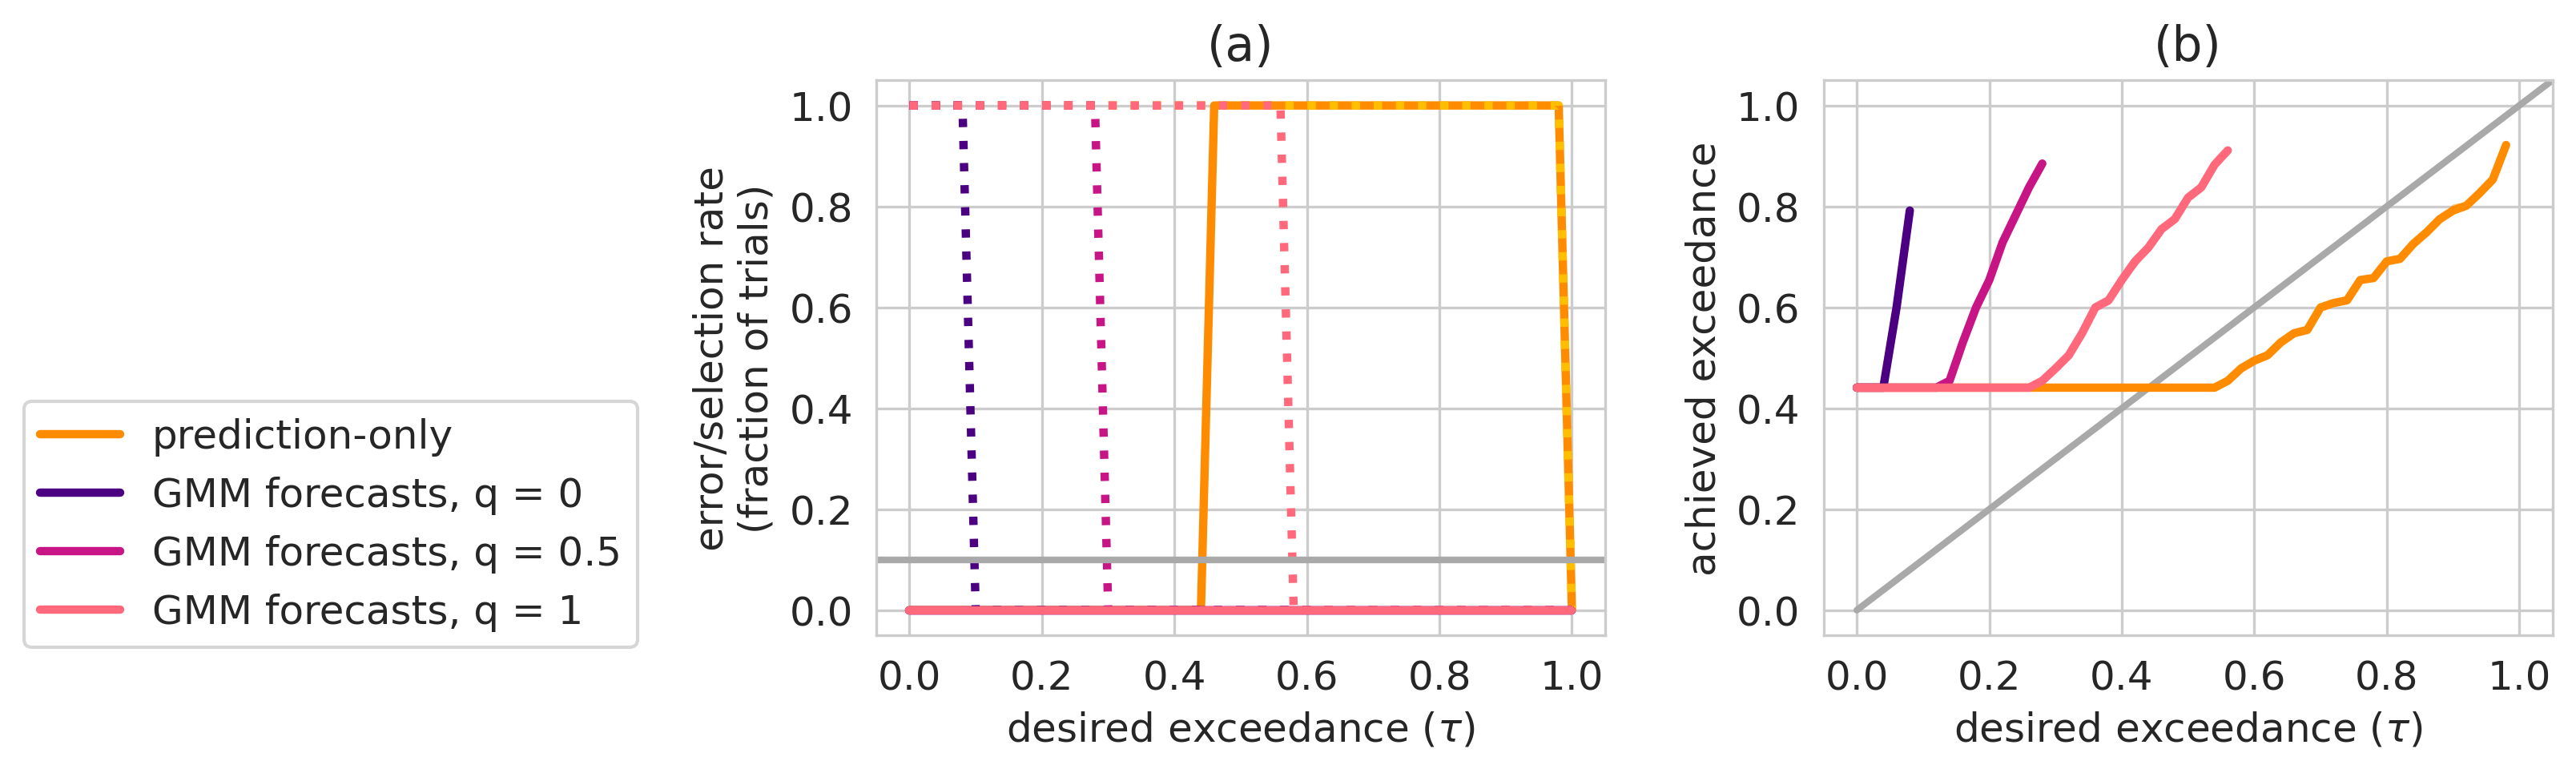

In [17]:
# one-row figure
fig, axs = plt.subplots(1, 2, figsize=(9, 3), dpi=300)
ax0 = axs[0]
ax1 = axs[1]
fig.subplots_adjust(wspace=0.3)

alpha = 0.1
gmm_type = 'cs'
imp_color = 'darkorange'
gmm_colors = ['indigo', 'mediumvioletred', '#ff697b']
dark_line_color = 'darkgray'

lw = 2.5
legend_fs = 12
imp_xlim = [-0.05, 1.05]
imp_xticks = np.arange(0, 1.01, 0.2)

q_low = 0.2
q_high = 0.8


# ===== subplot (a) =====
ax0.plot(target_values, imperr_v, c=imp_color, linewidth=lw);
ax0.plot(target_values, impdisc_v, ':', c=(255/255, 191/255, 0), linewidth=lw);

for q_idx, q in enumerate(gmm_forecast_qs):
    _, gmmerr_v, gmmdisc_v, _ = gmm_type2results[gmm_type][q]
    ax0.plot(target_values, gmmerr_v, c=gmm_colors[q_idx], linewidth=lw);
    ax0.plot(target_values, gmmdisc_v, ':', c=gmm_colors[q_idx], linewidth=lw);
    
ax0.axhline(alpha, linestyle='-', color=dark_line_color, alpha=1, linewidth=2, label=r'$\alpha = {}$'.format(alpha));

# dummy to get legend labels
ax0.plot(-1, -1, linestyle='-', color='k', linewidth=lw, label='error rate')
ax0.plot(-1, -1, linestyle=':', color='k', linewidth=lw, label='selection rate')

ax0.set_ylim([-0.05, 1.05])
ax0.set_yticks(np.arange(0, 1.05, 0.2))
ax0.set_xlim(imp_xlim)
ax0.set_xticks(imp_xticks)
ax0.set_ylabel('error/selection rate\n(fraction of trials)');
ax0.set_xlabel(r'desired exceedance ($\tau$)');
ax0.set_title('(a)');
# ax0.legend(fontsize=legend_fs, loc='center left', bbox_to_anchor=(-1.27, 0.8))
# ax0.legend(fontsize=legend_fs, loc='upper left', bbox_to_anchor=(0.0, 0.95))


# ===== subplot (b) =====

ax1.plot([0, 1.5], [0, 1.5], '-', c=dark_line_color, alpha=1, linewidth=2);
ax1.plot(
    target_values, [np.median(worst) if len(worst) else np.nan for worst in impworst_v],
    c=imp_color, label='prediction-only', linewidth=lw,
)
ax1.fill_between(
    target_values, [np.quantile(worst, q_low) if len(worst) else np.nan for worst in impworst_v],
    [np.quantile(worst, q_high) if len(worst) else np.nan for worst in impworst_v],
    color=imp_color, alpha=0.5,
)

for q_idx, q in enumerate(gmm_forecast_qs):
    gmmworst_v, _, _, _ = gmm_type2results[gmm_type][q]
    ax1.plot(
        target_values, [np.median(worst) if len(worst) else np.nan for worst in gmmworst_v],
        c=gmm_colors[q_idx], label=f'GMM forecasts, q = {q}', linewidth=lw,
    )
    ax1.fill_between(
        target_values, [np.quantile(worst, q_low) if len(worst) else np.nan for worst in gmmworst_v],
        [np.quantile(worst, q_high) if len(worst) else np.nan for worst in gmmworst_v],
        color=gmm_colors[q_idx], alpha=0.5,
    )

ax1.set_xlim(imp_xlim)
ax1.set_ylim(imp_xlim)
ax1.set_xticks(imp_xticks)
ax1.set_yticks(imp_xticks)
# ax1.legend(fontsize=legend_fs, loc='center left', bbox_to_anchor=(1.05, 0.5))
legend = ax1.legend(fontsize=legend_fs, loc='center right', bbox_to_anchor=(-1.6, 0.2))

ax1.set_title('(b)')
ax1.set_ylabel('achieved exceedance');
ax1.set_xlabel(r'desired exceedance ($\tau$)');
